In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### !pip install pandas
import pandas as pd
#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# DATA PREP

###  0) SETUP / UTILITIES

In [ ]:

# Rationale: Create a small "infrastructure" for any notebook so you can:
# - Save frozen snapshots (so you can always roll back or compare states).
# - Print quick, consistent progress reports between steps.
# - Compare schemas (column names/types) before vs after each step.

from pathlib import Path
import pandas as pd
import numpy as np
import time, json

# Create an artifacts/ folder to store snapshots and small metadata files.
ARTIFACTS = Path("artifacts")
ARTIFACTS.mkdir(exist_ok=True)

def timestamp():
    """Return a compact timestamp string like '20250914-1345'."""
    return time.strftime("%Y%m%d-%H%M%S")

def save_snapshot_df(df: pd.DataFrame, name: str) -> str:
    """
    Rationale: Persist a frozen copy of the DataFrame at important milestones
    so you can restore or audit later.
    Action: Try saving as parquet (preferred). If parquet engine is missing,
    fall back to CSV. Also save a tiny JSON with shape and dtypes.
    Returns: base path (string) without extension.
    """
    ts = timestamp()
    base = ARTIFACTS / f"{ts}_{name}"
    try:
        # Prefer parquet: space-efficient and fast to load.
        df.to_parquet(f"{base}.parquet", index=False)
        stored = f"{base}.parquet"
    except Exception:
        # Fallback to CSV if parquet engine isn't available.
        df.to_csv(f"{base}.csv", index=False)
        stored = f"{base}.csv"

    # Save a minimal schema/shape summary for quick reference.
    schema = {
        "name": name,
        "rows": int(len(df)),
        "cols": int(df.shape[1]),
        "dtypes": {c: str(t) for c, t in df.dtypes.items()}
    }
    with open(f"{base}_schema.json", "w", encoding="utf-8") as f:
        json.dump(schema, f, ensure_ascii=False, indent=2)

    print(f"[Saved] {stored} + {base.name}_schema.json")
    return str(base)

def quick_data_report(df: pd.DataFrame, title: str = "Dataset Report"):
    """
    Rationale: A compact health check after each major step.
    Action: Print shape, type distribution, top missing columns, duplicates,
    and short numeric/categorical describes.
    """
    print(f"=== {title} ===\n")
    print(f"Shape: {df.shape[0]:,} rows x {df.shape[1]:,} cols")

    print("\n-- Dtypes summary --")
    print(df.dtypes.value_counts())

    na = df.isna().sum()
    na = na[na > 0].sort_values(ascending=False)
    print("\n-- Missing (top 10) --")
    print(na.head(10))

    print("\n-- Duplicated rows --")
    print(df.duplicated().sum())

    print("\n-- Numeric describe (head) --")
    print(df.describe(include=[np.number]).T.head(8))

    print("\n-- Categorical describe (head) --")
    print(df.describe(include=['object','category']).T.head(8))

def diff_schema(df_before: pd.DataFrame, df_after: pd.DataFrame, title: str = "Schema Diff") -> pd.DataFrame:
    """
    Rationale: See what changed (columns added/dropped or dtypes converted).
    Action: Compare column → dtype mapping before vs after and print only changes.
    """
    a = pd.Series({c: str(t) for c, t in df_before.dtypes.items()}, name="before")
    b = pd.Series({c: str(t) for c, t in df_after.dtypes.items()},  name="after")
    allc = sorted(set(a.index) | set(b.index))
    diff = pd.DataFrame({"before": a.reindex(allc), "after": b.reindex(allc)})
    diff["changed"] = diff["before"] != diff["after"]
    print(f"=== {title} ===")
    print(diff[diff["changed"]])
    return diff



In [ ]:

# Rationale: Create a small "infrastructure" for any notebook so you can:
# - Save frozen snapshots (so you can always roll back or compare states).
# - Print quick, consistent progress reports between steps.
# - Compare schemas (column names/types) before vs after each step.

from pathlib import Path
import pandas as pd
import numpy as np
import time, json

# Create an artifacts/ folder to store snapshots and small metadata files.
ARTIFACTS = Path("artifacts")
ARTIFACTS.mkdir(exist_ok=True)

def timestamp():
    """Return a compact timestamp string like '20250914-1345'."""
    return time.strftime("%Y%m%d-%H%M%S")

def save_snapshot_df(df: pd.DataFrame, name: str) -> str:
    """
    Rationale: Persist a frozen copy of the DataFrame at important milestones
    so you can restore or audit later.
    Action: Try saving as parquet (preferred). If parquet engine is missing,
    fall back to CSV. Also save a tiny JSON with shape and dtypes.
    Returns: base path (string) without extension.
    """
    ts = timestamp()
    base = ARTIFACTS / f"{ts}_{name}"
    try:
        # Prefer parquet: space-efficient and fast to load.
        df.to_parquet(f"{base}.parquet", index=False)
        stored = f"{base}.parquet"
    except Exception:
        # Fallback to CSV if parquet engine isn't available.
        df.to_csv(f"{base}.csv", index=False)
        stored = f"{base}.csv"

    # Save a minimal schema/shape summary for quick reference.
    schema = {
        "name": name,
        "rows": int(len(df)),
        "cols": int(df.shape[1]),
        "dtypes": {c: str(t) for c, t in df.dtypes.items()}
    }
    with open(f"{base}_schema.json", "w", encoding="utf-8") as f:
        json.dump(schema, f, ensure_ascii=False, indent=2)

    print(f"[Saved] {stored} + {base.name}_schema.json")
    return str(base)

def quick_data_report(df: pd.DataFrame, title: str = "Dataset Report"):
    """
    Rationale: A compact health check after each major step.
    Action: Print shape, type distribution, top missing columns, duplicates,
    and short numeric/categorical describes.
    """
    print(f"=== {title} ===\n")
    print(f"Shape: {df.shape[0]:,} rows x {df.shape[1]:,} cols")

    print("\n-- Dtypes summary --")
    print(df.dtypes.value_counts())

    na = df.isna().sum()
    na = na[na > 0].sort_values(ascending=False)
    print("\n-- Missing (top 10) --")
    print(na.head(10))

    print("\n-- Duplicated rows --")
    print(df.duplicated().sum())

    print("\n-- Numeric describe (head) --")
    print(df.describe(include=[np.number]).T.head(8))

    print("\n-- Categorical describe (head) --")
    print(df.describe(include=['object','category']).T.head(8))

def diff_schema(df_before: pd.DataFrame, df_after: pd.DataFrame, title: str = "Schema Diff") -> pd.DataFrame:
    """
    Rationale: See what changed (columns added/dropped or dtypes converted).
    Action: Compare column → dtype mapping before vs after and print only changes.
    """
    a = pd.Series({c: str(t) for c, t in df_before.dtypes.items()}, name="before")
    b = pd.Series({c: str(t) for c, t in df_after.dtypes.items()},  name="after")
    allc = sorted(set(a.index) | set(b.index))
    diff = pd.DataFrame({"before": a.reindex(allc), "after": b.reindex(allc)})
    diff["changed"] = diff["before"] != diff["after"]
    print(f"=== {title} ===")
    print(diff[diff["changed"]])
    return diff



### 1. Uploading the data

In [ ]:
# === 1) LOAD TWO CSVs (df1, df2) ============================================
# Rationale: Keep each file in its own DataFrame so we can compare before merging.

import pandas as pd
import numpy as np

df1 = pd.read_csv("income_1.csv", index_col=0)
df2 = pd.read_csv("income_v2.csv", index_col=0)  # <- adjust name if needed
print("Loaded:", df1.shape, df2.shape)



Loaded: (32561, 8) (5677, 16)


### 2) QUICK PER-FILE REPORTS

In [ ]:

# Rationale: Understand each dataset separately (shape, dtypes, missing, duplicates).

# === QUICK DATA REPORT (with info + unique counts) ==========================
def quick_data_report(df, title="Report"):
    print(f"\n=== {title} ===")

    # Shape
    print("Shape:", df.shape)

    # Info: non-null counts and dtypes
    print("\n-- Info --")
    df.info()

    # Dtypes summary
    print("\n-- Dtypes summary --")
    print(df.dtypes.value_counts())

    # Unique counts
    print("\n-- Unique values per column (top 10) --")
    nunique = df.nunique(dropna=False).sort_values(ascending=False)
    print(nunique.head(10))

    # Missing values
    na = df.isna().sum()
    na = na[na > 0].sort_values(ascending=False)
    print("\n-- Missing (top 10) --")
    print(na.head(10))

    # Duplicates
    print("\n-- Duplicated rows --", df.duplicated().sum())

    # Numeric stats
    print("\n-- Numeric describe (head) --")
    print(df.describe(include=[np.number]).T.head(8))

    # Categorical stats
    print("\n-- Categorical describe (head) --")
    print(df.describe(include=['object','category']).T.head(8))

# Run for both datasets
quick_data_report(df1, "df1: Initial")
quick_data_report(df2, "df2: Initial")




=== df1: Initial ===
Shape: (32561, 8)

-- Info --
<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.2+ MB

-- Dtypes summary --
object    5
int64     3
Name: count, dtype: int64

-- Unique values per column (top 10) --
fnlwgt            21648
age                  73
education            16
education.num        16
occupation           15
workclass             9
marital.status        7
relationship          6
dtype: int64

-- Missing (top 10) --
Series([], dt

In [ ]:
# === ULTRA DATA REPORT ======================================================
# Rationale: Build one compact summary table with key facts per column.
# Includes: column name | dtype | non-null | missing | %missing | unique | sample values.

import pandas as pd
from IPython.display import display, Markdown

def ultra_data_report(df, title="Dataset Report"):
    """Return a DataFrame summarizing each column in df."""
    report = pd.DataFrame({
        "dtype": df.dtypes.astype(str),
        "non_null": df.notna().sum(),
        "missing": df.isna().sum(),
        "unique": df.nunique(dropna=False)
    })
    report["%missing"] = (report["missing"] / len(df) * 100).round(2)

    # Add sample values (up to 3 unique values as a preview)
    samples = {}
    for col in df.columns:
        vals = df[col].dropna().unique()[:3]
        samples[col] = ", ".join(map(str, vals))
    report["sample_values"] = pd.Series(samples)

    report = report.reset_index().rename(columns={"index": "column"})
    report = report.sort_values("%missing", ascending=False)
    return report

# === RUN ULTRA REPORTS FOR df1 and df2 ======================================
ultra_df1 = ultra_data_report(df1, "df1: Initial")
ultra_df2 = ultra_data_report(df2, "df2: Initial")

# Display with Markdown headings directly above each table
display(Markdown("### df1: Initial"))
display(ultra_df1.head(10))

display(Markdown("### df2: Initial"))
display(ultra_df2.head(10))


### df1: Initial

,column,dtype,non_null,missing,unique,%missing,sample_values
0,age,int64,32561,0,73,0.0,"90, 82, 66"
1,workclass,object,32561,0,9,0.0,"?, Private, State-gov"
2,fnlwgt,int64,32561,0,21648,0.0,"77053, 132870, 186061"
3,education,object,32561,0,16,0.0,"HS-grad, Some-college, 7th-8th"
4,education.num,int64,32561,0,16,0.0,"9, 10, 4"
5,marital.status,object,32561,0,7,0.0,"Widowed, Divorced, Separated"
6,occupation,object,32561,0,15,0.0,"?, Exec-managerial, Machine-op-inspct"
7,relationship,object,32561,0,6,0.0,"Not-in-family, Unmarried, Own-child"


### df2: Initial

,column,dtype,non_null,missing,unique,%missing,sample_values
2,workclass,object,5402,275,8,4.84,"Private, Stategov, Federalgov"
7,occupation,object,5402,275,15,4.84,"Execmanagerial, Machineopinspct, Profspecialty"
9,native.country,object,5563,114,14,2.01,"UnitedStates, North America, Asia"
1,age,int64,5677,0,69,0.00,"90, 82, 66"
3,fnlwgt,int64,5677,0,5004,0.00,"77053, 132870, 186061"
4,education,object,5677,0,16,0.00,"HSgrad, Somecollege, 7th8th"
5,education.num,int64,5677,0,16,0.00,"9, 10, 4"
0,ID,int64,5677,0,5677,0.00,"1548921, 1548922, 1548923"
6,marital.status,object,5677,0,7,0.00,"Widowed, Divorced, Separated"
8,hours.per.week,int64,5677,0,76,0.00,"40, 18, 45"


In [ ]:
# === 3) SCHEMA COMPARISON (COLUMNS & DTYPES) — KEEP AS IS ====================
# Purpose: See which columns are shared and whether dtypes align.
# Action: No change needed.

c1 = pd.Series(df1.dtypes.astype(str), name="df1")
c2 = pd.Series(df2.dtypes.astype(str), name="df2")
all_cols = sorted(set(c1.index) | set(c2.index))
schema = pd.concat([c1.reindex(all_cols), c2.reindex(all_cols)], axis=1)

same_cols = [c for c in all_cols if (c in df1.columns) and (c in df2.columns)]
only_df1  = [c for c in df1.columns if c not in df2.columns]
only_df2  = [c for c in df2.columns if c not in df1.columns]

print("Common columns:", same_cols)
print("\nColumns only in df1:", only_df1)
print("\nColumns only in df2:", only_df2)

mismatch = schema.loc[same_cols]
mismatch = mismatch[mismatch["df1"] != mismatch["df2"]]
print("\nDtype mismatches among common columns:\n", mismatch)


Common columns: ['age', 'education', 'education.num', 'fnlwgt', 'marital.status', 'occupation', 'relationship', 'workclass']

Columns only in df1: []

Columns only in df2: ['ID', 'hours.per.week', 'native.country', 'income', 'race', 'sex', 'capital.loss', 'age_range']

Dtype mismatches among common columns:
 Empty DataFrame
Columns: [df1, df2]
Index: []


###  4) CHECK MERGE KEYS QUALITY

In [ ]:
# === 4) QUICK KEY QUALITY CHECK — UPDATE KEYS ================================
# Purpose: Sanity-check missing/duplicates/overlap for the chosen key.
# Change: Use the better key we found: ['age','education.num','fnlwgt'].

merge_keys = ['age', 'education.num', 'fnlwgt']  # CHOSEN KEY

print("\nMissing in keys (df1):")
print(df1[merge_keys].isna().sum())
print("\nMissing in keys (df2):")
print(df2[merge_keys].isna().sum())

dup1 = df1.duplicated(subset=merge_keys).sum()
dup2 = df2.duplicated(subset=merge_keys).sum()
print(f"\nDuplicate key rows - df1: {dup1}, df2: {dup2}")

k1 = df1[merge_keys].drop_duplicates()
k2 = df2[merge_keys].drop_duplicates()
common_keys = len(pd.merge(k1, k2, on=merge_keys, how='inner'))
print(f"Distinct key combos: df1={len(k1)}, df2={len(k2)}, overlap={common_keys}")



Missing in keys (df1):
age              0
education.num    0
fnlwgt           0
dtype: int64

Missing in keys (df2):
age              0
education.num    0
fnlwgt           0
dtype: int64

Duplicate key rows - df1: 963, df2: 31
Distinct key combos: df1=31598, df2=5646, overlap=5646


In [ ]:
# === 4b) TRY A FEW SIMPLE KEY CANDIDATES — OPTIONAL (KEEP IF USEFUL) ========
# Purpose: Compare a few candidates quickly. You can keep or skip once decided.

import pandas as pd

candidates = [
    ['fnlwgt'],
    ['age','fnlwgt'],
    ['fnlwgt','education.num'],
    ['age','education.num','fnlwgt']  # this was the best by your output
]

def check_key(df1, df2, keys):
    miss1 = df1[keys].isna().any(axis=1).sum()
    miss2 = df2[keys].isna().any(axis=1).sum()
    u1 = df1[keys].dropna().drop_duplicates().shape[0]
    u2 = df2[keys].dropna().drop_duplicates().shape[0]
    dup1 = df1.dropna(subset=keys).duplicated(subset=keys).sum()
    dup2 = df2.dropna(subset=keys).duplicated(subset=keys).sum()
    k1 = df1[keys].dropna().drop_duplicates()
    k2 = df2[keys].dropna().drop_duplicates()
    overlap = pd.merge(k1, k2, on=keys, how='inner').shape[0]
    print(f"\nKeys={keys}")
    print(f"Missing df1/df2: {miss1} / {miss2}")
    print(f"Distinct combos df1/df2: {u1} / {u2} | overlap: {overlap}")
    print(f"Duplicate rows by keys df1/df2: {dup1} / {dup2}")

for keys in candidates:
    check_key(df1, df2, keys)



Keys=['fnlwgt']
Missing df1/df2: 0 / 0
Distinct combos df1/df2: 21648 / 5004 | overlap: 5004
Duplicate rows by keys df1/df2: 10913 / 673

Keys=['age', 'fnlwgt']
Missing df1/df2: 0 / 0
Distinct combos df1/df2: 29147 / 5514 | overlap: 5514
Duplicate rows by keys df1/df2: 3414 / 163

Keys=['fnlwgt', 'education.num']
Missing df1/df2: 0 / 0
Distinct combos df1/df2: 28855 / 5517 | overlap: 5517
Duplicate rows by keys df1/df2: 3706 / 160

Keys=['age', 'education.num', 'fnlwgt']
Missing df1/df2: 0 / 0
Distinct combos df1/df2: 31598 / 5646 | overlap: 5646
Duplicate rows by keys df1/df2: 963 / 31


### 5) KEY STANDARDIZATION & ROW FILTERING — UPDATE KEYS

In [ ]:

# Purpose: Clean string keys (if any), then drop rows with missing keys.
# Change: Use the same chosen keys here.

keys = ['age', 'education.num', 'fnlwgt']  # must match the chosen key above

def clean_str_col(s):
    # Only applied if dtype is object/string; safe no-op for numeric columns
    if s.dtype == 'object' or pd.api.types.is_string_dtype(s):
        s = (s.astype('string')
               .str.strip()
               .str.replace('-', '', regex=False)
               .str.replace(' ', '', regex=False)
               .replace({'': pd.NA, 'nan': pd.NA, 'None': pd.NA}))
    return s

for c in keys:
    if c in df1.columns:
        df1[c] = clean_str_col(df1[c])
    if c in df2.columns:
        df2[c] = clean_str_col(df2[c])

# Drop rows lacking any part of the key (inner join requires complete keys anyway)
df1_keys_ok = df1.dropna(subset=keys)
df2_keys_ok = df2.dropna(subset=keys)
print("After dropping missing-key rows:", df1_keys_ok.shape, df2_keys_ok.shape)

# (Optional) If you want to reduce many-to-many risk: deduplicate per key combo
df1_keys_ok = df1_keys_ok.drop_duplicates(subset=keys, keep='first')
df2_keys_ok = df2_keys_ok.drop_duplicates(subset=keys, keep='first')
print("After simple de-dup per key:", df1_keys_ok.shape, df2_keys_ok.shape)


After dropping missing-key rows: (32561, 8) (5677, 16)
After simple de-dup per key: (31598, 8) (5646, 16)


###  6) MERGE — UPDATE TO USE THE CLEANED DFS & CHOSEN KEYS
Inner Join                                                                                                                        
This type of merge returns only the rows where there is a match between the two dataframes.<br>                                      
Outer Join      <br>                                                                                                              This type of merge returns all rows from both dataframes, and fills in NaN where there are no matches.

In [ ]:
# Purpose: Perform the merge with the chosen, cleaned key set.
# Change: Merge df1_keys_ok with df2_keys_ok on ['age','education.num','fnlwgt'].

merged_df = pd.merge(
    df1_keys_ok, df2_keys_ok,
    on=['age', 'education.num', 'fnlwgt'],
    how='inner',
    suffixes=('_x','_y')  # we'll resolve pairs later if needed
)

print("Merged shape:", merged_df.shape)
merged_df.head()


Merged shape: (5646, 21)


,age,workclass_x,fnlwgt,education_x,education.num,marital.status_x,occupation_x,relationship_x,ID,workclass_y,...,marital.status_y,occupation_y,hours.per.week,native.country,income,relationship_y,race,sex,capital.loss,age_range
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,1548921,NaN,...,Widowed,NaN,40,UnitedStates,<=50K,Notinfamily,White,1,4356,>70
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,1548922,Private,...,Widowed,Execmanagerial,18,UnitedStates,<=50K,Notinfamily,White,1,4356,>70
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,1548923,NaN,...,Widowed,NaN,40,UnitedStates,<=50K,Unmarried,Black,1,4356,45-69
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,1548924,Private,...,Divorced,Machineopinspct,40,UnitedStates,<=50K,Unmarried,White,1,3900,45-69
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,1548925,Private,...,Separated,Profspecialty,40,UnitedStates,<=50K,Ownchild,White,1,3900,35-44


###  7) SAVE RAW SNAPSHOT & PREP WORKING COPY — KEEP

In [ ]:
# === SAVE RAW SNAPSHOT + CREATE WORKING COPY + EXPORT ULTRA REPORT ===========
# Purpose:
# 1) Persist a frozen copy of the merged dataset to disk (parquet if possible, else CSV).
# 2) Keep an in-memory immutable reference (df_raw) you never touch.
# 3) Work only on df (all cleaning happens here).
# 4) Generate a compact, tabular "Ultra Report" of columns and save it to CSV/Excel.

import time, json
from pathlib import Path
import pandas as pd

# --- Safety: ensure merge was executed ---
assert 'merged_df' in globals(), "merged_df is not defined. Run the merge cell first."

# --- Ensure artifacts folder & timestamp utility exist ---
ARTIFACTS = Path("artifacts"); ARTIFACTS.mkdir(exist_ok=True)
def timestamp(): return time.strftime("%Y%m%d-%H%M%S")

# --- Snapshot helper (always available here) ---
def save_snapshot_df(df: pd.DataFrame, name: str) -> str:
    base = ARTIFACTS / f"{timestamp()}_{name}"
    try:
        df.to_parquet(f"{base}.parquet", index=False)
        stored = f"{base}.parquet"
    except Exception:
        df.to_csv(f"{base}.csv", index=False)
        stored = f"{base}.csv"
    schema = {
        "name": name,
        "rows": int(len(df)),
        "cols": int(df.shape[1]),
        "dtypes": {c: str(t) for c, t in df.dtypes.items()}
    }
    with open(f"{base}_schema.json", "w", encoding="utf-8") as f:
        json.dump(schema, f, ensure_ascii=False, indent=2)
    print(f"[Saved] {stored} + {base.name}_schema.json")
    return str(base)

# --- ALWAYS (re)define quick_data_report with title/top_n --------------------
try:
    del quick_data_report  # remove old signature if it exists
except NameError:
    pass

def quick_data_report(df, title="Dataset Report", top_n=10):
    print(f"=== {title} ===\n")
    print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]:,}")

    print("\n--- Dtypes summary ---")
    print(df.dtypes.value_counts())

    nunique = df.nunique(dropna=False).sort_values(ascending=False)
    print(f"\n--- Unique values (Top {top_n}) ---")
    print(nunique.head(top_n))

    na_counts = df.isna().sum()
    na_counts = na_counts[na_counts > 0].sort_values(ascending=False)
    print(f"\n--- Missing values (Top {top_n}) ---")
    print(na_counts.head(top_n))

    print("\n--- Duplicated rows ---")
    print("Total duplicated rows:", int(df.duplicated().sum()))

    num_desc = df.describe(include='number').T
    if not num_desc.empty:
        print(f"\n--- Descriptive statistics (numeric, Top {top_n}) ---")
        print(num_desc.head(top_n))

    cat_desc = df.describe(include=['object', 'string', 'category']).T
    if not cat_desc.empty:
        print(f"\n--- Descriptive statistics (categorical/text, Top {top_n}) ---")
        print(cat_desc.head(top_n))

# --- 1) Save frozen snapshot of merged_df ---
RAW_SNAPSHOT_PATH = save_snapshot_df(merged_df, "raw_loaded")

# --- 2) Create immutable and working copies ---
df_raw = merged_df.copy(deep=True)   # do not modify
df     = merged_df.copy(deep=True)   # all cleaning will use 'df'

# --- 3) Quick sanity report on the starting point ---
quick_data_report(df, title="Initial Report (raw merged)", top_n=10)

# --- 4) Ultra Report builder + export ---------------------------------------
def build_ultra_report(df: pd.DataFrame) -> pd.DataFrame:
    rep = pd.DataFrame({
        "dtype": df.dtypes.astype(str),
        "non_null": df.notna().sum(),
        "missing": df.isna().sum(),
        "unique": df.nunique(dropna=False)
    })
    rep["%missing"] = (rep["missing"] / len(df) * 100).round(2)
    samples = {}
    for col in df.columns:
        vals = df[col].dropna().unique()[:3]
        samples[col] = ", ".join(map(str, vals))
    rep["sample_values"] = pd.Series(samples)
    rep = rep.reset_index().rename(columns={"index": "column"})
    return rep.sort_values("%missing", ascending=False)

ultra = build_ultra_report(df)
ts = timestamp()
csv_path   = ARTIFACTS / f"{ts}_ultra_report_raw_merged.csv"
excel_path = ARTIFACTS / f"{ts}_ultra_report_raw_merged.xlsx"

ultra.to_csv(csv_path, index=False)
try:
    ultra.to_excel(excel_path, index=False)
    print(f"[Saved] Ultra Report → {csv_path.name} and {excel_path.name}")
except Exception as e:
    print(f"[Saved] Ultra Report → {csv_path.name} (Excel export skipped: {e})")



[Saved] artifacts\20250914-171233_raw_loaded.csv + 20250914-171233_raw_loaded_schema.json
=== Initial Report (raw merged) ===

Rows: 5,646, Columns: 21

--- Dtypes summary ---
object    14
int64      7
Name: count, dtype: int64

--- Unique values (Top 10) ---
ID                5646
fnlwgt            5004
capital.loss        92
hours.per.week      76
age                 69
education_x         16
education.num       16
education_y         16
occupation_y        15
occupation_x        15
dtype: int64

--- Missing values (Top 10) ---
workclass_y       274
occupation_y      274
native.country    114
dtype: int64

--- Duplicated rows ---
Total duplicated rows: 0

--- Descriptive statistics (numeric, Top 10) ---
                 count          mean            std        min         25%  \
age             5646.0  4.194793e+01      13.326337       17.0       32.00   
fnlwgt          5646.0  1.880733e+05  103473.567902    19302.0   117478.75   
education.num   5646.0  1.076922e+01       2.654484

In [ ]:
# === STEP 8) STRUCTURAL CLEANING — Resolve *_x / *_y duplicate pairs =========
# Purpose:
# 1) Detect and consolidate column pairs created by merge (e.g., 'education_x' & 'education_y').
# 2) Clear rules per pair:
#    - If ALL values are identical → keep <base>, drop _x/_y.
#    - If differences are only NaN vs non-NaN → fill from the other side, drop _x/_y.
#    - If true conflicts (both non-NaN and different) → create unified <base> (combine_first),
#      retain sources as <base>_file1 / <base>_file2, and add boolean <base>_conflict flag.
# 3) Produce a compact report with counts: how many values were filled, how many conflicts remain.
#
# Why now?
# After merge, duplicated columns (_x/_y) clutter the schema and may disagree.
# Cleaning structure first prevents type-conversion headaches later.

import pandas as pd

# --- (A) Quick preview: which *_x pairs exist (and do they have a matching *_y)? ---
x_cols_preview = [c for c in df.columns if c.endswith('_x')]
print("Candidate pairs by _x suffix:", x_cols_preview or "None")

# --- (B) Helper: robust string view for safe comparisons across dtypes ----------
def _as_string(s: pd.Series) -> pd.Series:
    """
    Rationale: Compare heterogenous columns safely (object/category/number).
    Action: Cast to pandas 'string' dtype and normalize obvious empties.
    """
    if pd.api.types.is_string_dtype(s) or s.dtype == "object" or pd.api.types.is_categorical_dtype(s):
        s = s.astype("string")
    else:
        # For numeric/datetime/boolean, cast to string but preserve NaNs
        s = s.astype("string")
    # Normalize trivial empties
    return s.replace({"": pd.NA, "nan": pd.NA, "None": pd.NA})

# --- (C) Core function: resolve all *_x/*_y pairs according to the policy -----
def resolve_xy_duplicates(df_in: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Parameters
    ----------
    df_in : DataFrame with potential *_x/*_y duplicate columns.

    Returns
    -------
    df_out : DataFrame after consolidation.
    report : Per-base-column summary (action taken, counts filled, conflicts).
    """
    df_out = df_in.copy()
    rows = []

    # Find all bases that have both _x and _y
    x_cols = [c for c in df_out.columns if c.endswith('_x')]
    for x_col in x_cols:
        base = x_col[:-2]  # remove "_x"
        y_col = base + "_y"
        if y_col not in df_out.columns:
            continue  # not a pair → skip

        # Compare as normalized strings (robust to category mismatch)
        sx = _as_string(df_out[x_col])
        sy = _as_string(df_out[y_col])

        # Equal if same or both NA (element-wise)
        eq_mask = (sx == sy) | (sx.isna() & sy.isna())
        all_equal = bool(eq_mask.all())

        # Fillable where x is NA and y is not; similarly for the reverse
        fill_x_from_y = df_out[x_col].isna() & df_out[y_col].notna()
        fill_y_from_x = df_out[y_col].isna() & df_out[x_col].notna()
        n_fill_x_from_y = int(fill_x_from_y.sum())
        n_fill_y_from_x = int(fill_y_from_x.sum())

        # True conflicts: both non-NA and different
        conflict_mask = df_out[x_col].notna() & df_out[y_col].notna() & ~(sx == sy)
        n_conflicts = int(conflict_mask.sum())

        if all_equal:
            # Action: collapse to a single <base>
            df_out[base] = df_out[x_col]
            df_out.drop(columns=[x_col, y_col], inplace=True)
            action = "identical_merged_drop_xy"

        elif n_conflicts == 0:
            # Action: only NA differences → combine_first is enough; drop _x/_y
            df_out[base] = df_out[x_col].combine_first(df_out[y_col])
            df_out.drop(columns=[x_col, y_col], inplace=True)
            action = "filled_nans_drop_xy"

        else:
            # Action: conflicts exist → keep unified base + retain sources + flag conflicts
            df_out[base] = df_out[x_col].combine_first(df_out[y_col])
            df_out[base + "_conflict"] = conflict_mask
            df_out.rename(columns={x_col: base + "_file1", y_col: base + "_file2"}, inplace=True)
            action = "conflicts_flagged_keep_sources"

        rows.append({
            "base": base,
            "action": action,
            "rows_total": len(df_out),
            "n_fill_x_from_y": n_fill_x_from_y,
            "n_fill_y_from_x": n_fill_y_from_x,
            "n_conflicts": n_conflicts
        })

    report = pd.DataFrame(rows).sort_values(["action", "base"]) if rows else pd.DataFrame(columns=[
        "base","action","rows_total","n_fill_x_from_y","n_fill_y_from_x","n_conflicts"
    ])

    # Totals row for quick at-a-glance
    if not report.empty:
        totals = {
            "base": "TOTALS",
            "action": "",
            "rows_total": report["rows_total"].max(),
            "n_fill_x_from_y": int(report["n_fill_x_from_y"].sum()),
            "n_fill_y_from_x": int(report["n_fill_y_from_x"].sum()),
            "n_conflicts": int(report["n_conflicts"].sum())
        }
        report = pd.concat([report, pd.DataFrame([totals])], ignore_index=True)

    return df_out, report

# --- (D) Run the consolidation on the current working df ---------------------
df_before_struct = df.copy()  # keep for your own reference (optional)

df, xy_report = resolve_xy_duplicates(df)

print("=== *_x/_y consolidation report ===")
print(xy_report if not xy_report.empty else "No _x/_y pairs found.")

# --- (E) (Optional) Quick post-cleaning snapshot/report ----------------------
# Save a snapshot so you can always reload this milestone.
save_snapshot_df(df, "post_structural_clean")

# Brief health check after structural cleaning (re-uses your quick_data_report)
quick_data_report(df, title="After Structural Cleaning", top_n=10)


Candidate pairs by _x suffix: ['workclass_x', 'education_x', 'marital.status_x', 'occupation_x', 'relationship_x']
=== *_x/_y consolidation report ===
             base                          action  rows_total  \
0       education  conflicts_flagged_keep_sources        5646   
1      occupation  conflicts_flagged_keep_sources        5646   
2    relationship  conflicts_flagged_keep_sources        5646   
3       workclass  conflicts_flagged_keep_sources        5646   
4  marital.status        identical_merged_drop_xy        5646   
5          TOTALS                                        5646   

   n_fill_x_from_y  n_fill_y_from_x  n_conflicts  
0                0                0         3475  
1                0              274         4710  
2                0                0         1859  
3                0              274         1689  
4                0                0            0  
5                0              548        11733  
[Saved] artifacts\20250914-172944_po

In [ ]:
# === STEP 9) NORMALIZE & RESOLVE "SOFT" CONFLICTS BETWEEN _file1/_file2 =====
# Purpose:
# 1) For bases that still have <base>_file1 / <base>_file2 and <base>_conflict,
#    try to resolve disagreements caused only by formatting (spaces/dashes/case).
# 2) If normalized values match → choose a canonical value (by default, file1),
#    clear the conflict flag, and (if no conflicts remain) drop the source columns.
# 3) Produce a compact report of before/after conflict counts and actions taken.

import pandas as pd
import numpy as np
import re

# --- Helper: normalization for category-like strings -------------------------
def normalize_token(s: pd.Series) -> pd.Series:
    """
    Rationale: Many differences are superficial (e.g., 'HS-grad' vs 'HSgrad').
    Action: Lowercase; remove spaces, hyphens, underscores; strip.
    """
    s = s.astype("string")
    s = s.str.strip().str.lower()
    s = s.str.replace(r"[\s\-_]+", "", regex=True)
    # Treat empty-like as NA
    return s.replace({"": pd.NA, "nan": pd.NA, "none": pd.NA})

# --- Core function: resolve soft conflicts for all bases with *_conflict -----
def resolve_soft_conflicts(df_in: pd.DataFrame, prefer: str = "file1"):
    """
    Parameters
    ----------
    df_in : DataFrame expected to contain columns:
            <base> (unified), <base>_file1, <base>_file2, <base>_conflict (boolean)
    prefer : Which side to keep as canonical when normalization shows equivalence.
             Options: "file1" or "file2"

    Returns
    -------
    df_out : DataFrame after normalization-based reconciliation.
    report : Per-base summary with before/after conflict counts and actions.
    pair_tables : dict(base -> DataFrame) of top unresolved (file1,file2) pairs (for manual review).
    """
    assert prefer in {"file1", "file2"}
    df_out = df_in.copy()
    rows = []
    pair_tables = {}

    # Identify all bases that currently have a conflict flag
    bases = [c[:-9] for c in df_out.columns if c.endswith("_conflict")]

    for base in bases:
        f1, f2, flag = f"{base}_file1", f"{base}_file2", f"{base}_conflict"
        if not ({f1, f2, flag} <= set(df_out.columns)):
            # Not a kept-sources base (maybe already resolved earlier)
            continue

        # Initial conflict count (before)
        before_conf = int(df_out[flag].sum())

        # Normalize both sides for safe comparison
        n1 = normalize_token(df_out[f1])
        n2 = normalize_token(df_out[f2])

        # Rows where normalized values match (i.e., only formatting differed)
        same_norm = n1.notna() & (n1 == n2)

        # Apply canonical choice on those rows
        if prefer == "file1":
            df_out.loc[same_norm, base] = df_out.loc[same_norm, f1]
        else:
            df_out.loc[same_norm, base] = df_out.loc[same_norm, f2]

        # Recompute conflict flag: true conflicts remain where both non-NA and normalized differ
        still_conflict = (
            df_out[f1].notna() & df_out[f2].notna() &
            (normalize_token(df_out[f1]) != normalize_token(df_out[f2]))
        )
        df_out[flag] = still_conflict

        # Build a small “disagreement table” for remaining conflicts (top 20)
        unresolved_mask = df_out[flag].fillna(False)
        if unresolved_mask.any():
            pairs = (
                df_out.loc[unresolved_mask, [f1, f2]]
                      .value_counts(dropna=False)
                      .reset_index(name="count")
                      .sort_values("count", ascending=False)
                      .head(20)
            )
            pair_tables[base] = pairs
        else:
            pair_tables[base] = pd.DataFrame(columns=[f1, f2, "count"])

        after_conf = int(df_out[flag].sum())
        resolved_by_norm = before_conf - after_conf

        # If no conflicts left → safe to drop the source columns and the flag
        dropped_sources = False
        if after_conf == 0:
            df_out.drop(columns=[f1, f2, flag], inplace=True, errors="ignore")
            dropped_sources = True

        rows.append({
            "base": base,
            "conflicts_before": before_conf,
            "resolved_by_normalization": resolved_by_norm,
            "conflicts_remaining": after_conf,
            "dropped_sources": dropped_sources
        })

    report = pd.DataFrame(rows).sort_values(["conflicts_remaining", "base"])
    return df_out, report, pair_tables

# --- Run soft-conflict resolution on the current df --------------------------
df_before_soft = df.copy()

df, soft_report, pair_tables = resolve_soft_conflicts(df, prefer="file1")

print("=== Soft-conflict resolution summary ===")
print(soft_report if not soft_report.empty else "No conflict flags were present.")

# Optional: inspect top unresolved value-pairs per base (if any remain)
for base, tbl in pair_tables.items():
    if not tbl.empty:
        print(f"\nTop unresolved (file1 vs file2) pairs for '{base}':")
        print(tbl)

# Save a snapshot at this milestone and a quick health check
save_snapshot_df(df, "post_soft_conflict_normalization")
quick_data_report(df, title="After Soft Conflict Normalization", top_n=10)



=== Soft-conflict resolution summary ===
           base  conflicts_before  resolved_by_normalization  \
1     education              3475                       3475   
2    occupation              4710                       4710   
3  relationship              1859                       1859   
0     workclass              1689                       1689   

   conflicts_remaining  dropped_sources  
1                    0             True  
2                    0             True  
3                    0             True  
0                    0             True  
[Saved] artifacts\20250914-203008_post_soft_conflict_normalization.csv + 20250914-203008_post_soft_conflict_normalization_schema.json
=== After Soft Conflict Normalization ===

Rows: 5,646, Columns: 16

--- Dtypes summary ---
object    9
int64     7
Name: count, dtype: int64

--- Unique values (Top 10) ---
ID                5646
fnlwgt            5004
capital.loss        92
hours.per.week      76
age                 69
educa

### 3. Convert an objects into viable data
(string, int, float....)

###STEP 10) TEXT STANDARDIZATION + TYPE CONVERSIONS

In [ ]:
# Goal:
# 1) Normalize textual values across all object-like columns (trim/case/whitespace).
# 2) Convert columns from generic 'object' to the most suitable dtype:
#    - IDs / free-text → string
#    - Low-cardinality categories → category (optionally ordered)
#    - Numeric-in-text → numeric (if any)
#    - Dates-in-text → datetime (if any)
# Notes:
# We won't impute missing values here; handle that in the dedicated "Missing Data" step.

import pandas as pd
import numpy as np

# --- (A) Helper: standardize strings for a list of columns -------------------
# Rationale: reduce accidental category proliferation (e.g., trailing spaces/case).
def standardize_text_columns(df: pd.DataFrame, cols: list[str] | None = None) -> pd.DataFrame:
    """
    Normalize common nuisances in textual/categorical columns:
      - strip leading/trailing whitespace
      - collapse internal whitespace runs to a single space
      - unify case (title/lower as you prefer; we keep original tokens except trimming)
    """
    df = df.copy()
    if cols is None:
        cols = df.select_dtypes(include=['object','string','category']).columns.tolist()

    for c in cols:
        s = df[c].astype('string')  # safe view
        # trim outside
        s = s.str.strip()
        # collapse internal whitespace (e.g. "New   York" -> "New York")
        s = s.str.replace(r"\s+", " ", regex=True)
        # normalize empty-like tokens
        s = s.replace({"": pd.NA, "nan": pd.NA, "None": pd.NA})
        df[c] = s
    return df

# --- (B) Decide target types for your dataset --------------------------------
# Based on your current columns after soft-conflict step:
# candidates for 'category'
cat_candidates = [
    'workclass','education','marital.status','occupation',
    'relationship','race','native.country','age_range','income'
]
# IDs / identifiers → string (not a model feature)
id_candidates = ['ID']

# Ordered categories example (age_range)
age_range_order = ['<18','18-24','25-34','35-44','45-69','>70']

# --- (C) Apply text standardization ------------------------------------------
df = standardize_text_columns(df)  # normalize all object-like columns

# --- (D) Convert IDs to string explicitly -----------------------------------
for col in id_candidates:
    if col in df.columns:
        df[col] = df[col].astype('string')

# --- (E) Convert selected columns to category (unordered/ordered) ------------
for col in cat_candidates:
    if col in df.columns:
        if col == 'age_range':
            # Make age_range an ordered categorical
            present = [lvl for lvl in age_range_order if lvl in set(df[col].dropna().unique())]
            df[col] = pd.Categorical(df[col], categories=age_range_order, ordered=True)
        else:
            df[col] = df[col].astype('category')

# --- (F) Optional: detect numeric-in-text and convert (none obvious here) ----
# Example pattern if needed in future:
# numeric_like = ['some_numeric_text_col']
# for col in numeric_like:
#     if col in df.columns:
#         df[col] = pd.to_numeric(df[col].astype('string').str.replace(",",""), errors='coerce')

# --- (G) Optional: detect date-in-text and convert (none obvious here) -------
# Example:
# date_like = ['some_date_col']
# for col in date_like:
#     if col in df.columns:
#         df[col] = pd.to_datetime(df[col].astype('string'), errors='coerce', dayfirst=False)

# --- (H) Sanity check + save snapshot ---------------------------------------
print("Dtype counts after conversions:\n", df.dtypes.value_counts())
save_snapshot_df(df, "post_type_conversions")
quick_data_report(df, title="After Type Conversions", top_n=10)


Dtype counts after conversions:
 int64             6
string[python]    1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
Name: count, dtype: int64
[Saved] artifacts\20250914-203828_post_type_conversions.csv + 20250914-203828_post_type_conversions_schema.json
=== After Type Conversions ===

Rows: 5,646, Columns: 16

--- Dtypes summary ---
int64             6
string[python]    1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
Name: count, dtype: int64

--- Unique values (Top 10) ---
ID                5646
fnlwgt            5004
capital.loss        92
hours.per.week      76
age                 69
education.num       16
education           16
occupation          15
native.country      14
workclass            8
dtype: int64

--- Mi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5646 entries, 0 to 5645
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             5646 non-null   int64   
 1   fnlwgt          5646 non-null   int64   
 2   education.num   5646 non-null   int64   
 3   ID              5646 non-null   string  
 4   hours.per.week  5646 non-null   int64   
 5   native.country  5532 non-null   category
 6   income          5646 non-null   category
 7   race            5646 non-null   category
 8   sex             5646 non-null   int64   
 9   capital.loss    5646 non-null   int64   
 10  age_range       5646 non-null   category
 11  workclass       5646 non-null   category
 12  education       5646 non-null   category
 13  marital.status  5646 non-null   category
 14  occupation      5646 non-null   category
 15  relationship    5646 non-null   category
dtypes: category(9), int64(6), string(1)
memory usage: 362.0 KB


In [ ]:
df.describe()   # סטטיסטיקות בסיסיות

,age,fnlwgt,education.num,hours.per.week,sex,capital.loss
count,5646.000000,5.646000e+03,5646.000000,5646.000000,5646.000000,5646.000000
mean,41.947928,1.880733e+05,10.769217,42.519306,0.258236,502.827666
std,13.326337,1.034736e+05,2.654484,12.286565,0.437703,852.307416
min,17.000000,1.930200e+04,1.000000,1.000000,0.000000,0.000000
25%,32.000000,1.174788e+05,9.000000,40.000000,0.000000,0.000000
50%,41.000000,1.762550e+05,10.000000,40.000000,0.000000,0.000000
75%,51.000000,2.373110e+05,13.000000,50.000000,1.000000,1485.000000
max,90.000000,1.033222e+06,16.000000,99.000000,1.000000,4356.000000


In [ ]:
df.isna().sum() # ספירת חסרים

age                 0
fnlwgt              0
education.num       0
ID                  0
hours.per.week      0
native.country    114
income              0
race                0
sex                 0
capital.loss        0
age_range           0
workclass           0
education           0
marital.status      0
occupation          0
relationship        0
dtype: int64

In [ ]:
df.duplicated().sum() # בדיקת כפילויות שורות

np.int64(0)

In [ ]:
# We can replace df['income'] values to avoid risk of changing the values in other columns
df=df.replace(to_replace="<=50K", value="0")
df=df.replace(to_replace=">50K", value="1")

In [ ]:
df['income'].value_counts()

income
0    2921
1    2725
Name: count, dtype: Int64

# Values of the categorial feature

In [ ]:
#Values of the categorial feature
df['education'].value_counts()

education
HS-grad         1573
Bachelors       1185
Some-college    1082
Masters          486
Assoc-voc        256
Prof-school      230
Assoc-acdm       192
11th             144
Doctorate        141
10th             109
7th-8th           84
9th               56
12th              44
5th-6th           39
1st-4th           19
Preschool          6
Name: count, dtype: int64

In [ ]:
df['education']=df['education'].astype('string')
df['education']=df['education'].str.replace('-','')

In [ ]:
df.info()

### 5. Clean Text - remove punctuation

In [ ]:
#!pip install string
import string

In [ ]:
# Columns to convert
columns_to_convert = ['workclass', 'education', 'relationship', 'sex', 'race','occupation','native.country']

# Convert specified columns to string type and create string_df
string_df = df[columns_to_convert].astype('string')

In [ ]:
# Convert specified columns to string type and create string_df
string_df = df[columns_to_convert].astype(str)

# Remove punctuation in one line
string_df = string_df.applymap(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Assign the cleaned columns back to the original DataFrame
df[columns_to_convert] = string_df

# Display the resulting DataFrame
df

exploring features

In [ ]:
df['race'].value_counts()
#df['workclass'].value_counts()
#df['relationship'].value_counts()

### 6. Narrowing Categories

Exploriring the 'native.country' category

In [ ]:
df['native.country'].value_counts()

native.country
UnitedStates             5126
Asia                      155
North America             109
Europe                     64
UK                         21
ElSalvador                 14
PuertoRico                 14
South America              12
Center America              7
DominicanRepublic           6
TrinadadTobago              2
OutlyingUSGuamUSVIetc       1
HolandNetherlands           1
Name: count, dtype: int64

In [ ]:
# === COUNTRY → REGION (tailored to your unique values) =======================
# Purpose:
# - Map 'native.country' to a new regional feature 'native.region'.
# - Do NOT overwrite the original country column.
# - Handle existing region labels, typos, and NaNs safely.
# - Print a coverage report (what got mapped; anything left unmapped).

import pandas as pd
import numpy as np
import re

col = "native.country"
assert col in df.columns, "'native.country' column is missing."

# (A) Normalizer for robust matching (lowercase; remove spaces/punct)
def _norm_token(s: pd.Series) -> pd.Series:
    s = s.astype("string")
    s = s.str.strip().str.lower()
    s = s.str.replace(r"[^\w\s]", "", regex=True).str.replace(r"\s+", "", regex=True)
    return s.replace({"": pd.NA, "nan": pd.NA, "none": pd.NA})

country_norm = _norm_token(df[col])

# (B) Canonical region names we accept “as-is” if they already appear
ALREADY_REGION = {
    "North America", "South America", "Central America",
    "Caribbean", "Europe", "Asia", "Africa", "Oceania", "Middle East"
}

# (C) Normalized dictionary for your observed tokens
MAP_NORM = {
    # Regions already in the data (keep as canonical)
    "northamerica": "North America",
    "southamerica": "South America",
    "centeramerica": "Central America",  # your data uses "Center America"
    "centralamerica": "Central America",
    "europe": "Europe",
    "asia": "Asia",

    # United States / territories
    "unitedstates": "North America",
    "outlyingusguamusvietc": "North America",

    # UK and Netherlands → Europe
    "uk": "Europe",
    "holandnetherlands": "Europe",

    # Specific countries seen in your data
    "elsalvador": "Central America",
    "dominicanrepublic": "North America",  # follow supervisor's choice
    "puertorico": "North America",         # follow supervisor's choice
    "trinadadtobago": "Caribbean",         # typo variant; choose Caribbean by default
}

# (D) Row-wise mapping function (preserves existing region labels)
def map_to_region(raw_val, norm_val):
    # Missing → Unknown
    if pd.isna(raw_val):
        return "Unknown"
    # If the raw string is already a region label we accept, keep it title-cased
    if isinstance(raw_val, str) and raw_val.strip().title() in ALREADY_REGION:
        return raw_val.strip().title()
    # Else map via normalized dictionary
    if pd.notna(norm_val) and norm_val in MAP_NORM:
        return MAP_NORM[norm_val]
    # Fallback
    return "Other"

df["native.region"] = [
    map_to_region(r, n) for r, n in zip(df[col].tolist(), country_norm.tolist())
]
df["native.region"] = df["native.region"].astype("category")

# (E) Coverage report
print("=== Country→Region mapping summary ===")
print("Region value counts:")
print(df["native.region"].value_counts(dropna=False))

# Any raw tokens not covered by the dictionary and not already regions?
unmapped_mask = (~country_norm.isna()) & (~country_norm.isin(MAP_NORM.keys()))
unmapped_raw = (
    df.loc[unmapped_mask & ~df[col].isin(ALREADY_REGION), col]
      .dropna()
      .value_counts()
)
if not unmapped_raw.empty:
    print("\nUnmapped raw country tokens (review needed):")
    print(unmapped_raw)
else:
    print("\nAll observed tokens were mapped or recognized as regions.")

# (F) Optional: snapshot
save_snapshot_df(df, "post_region_mapping_tailored")


=== Country→Region mapping summary ===
Region value counts:
native.region
North America      5256
Asia                155
Unknown             114
Europe               86
Central America      21
South America        12
Caribbean             2
Name: count, dtype: int64

Unmapped raw country tokens (review needed):
native.country
Asia                     0
Center America           0
DominicanRepublic        0
ElSalvador               0
Europe                   0
HolandNetherlands        0
North America            0
OutlyingUSGuamUSVIetc    0
PuertoRico               0
South America            0
TrinadadTobago           0
UK                       0
UnitedStates             0
Name: count, dtype: int64
[Saved] artifacts\20250914-213935_post_region_mapping_tailored.csv + 20250914-213935_post_region_mapping_tailored_schema.json


'artifacts\\20250914-213935_post_region_mapping_tailored'

In [ ]:
before = df['native.country'].value_counts(dropna=False)
# ... run your mapping ...
after = df['native.country'].value_counts(dropna=False)
print("Changed rows:", int((before != after).sum() > 0))


Changed rows: 0


## Changing values

In [ ]:
# --- Ensure 'sex' is clean binary and keep a readable label ------------------
# Rationale: enforce numeric binary type; keep a label column for readability.
if 'sex' in df.columns:
    # Coerce to Int8/boolean, assuming values already 0/1
    df['sex'] = df['sex'].astype('Int8')  # or: df['sex'] = df['sex'].astype('boolean')
    # Optional: keep a human-readable copy
    sex_map = {0: 'Male', 1: 'Female'}
    df['sex_label'] = df['sex'].map(sex_map).astype('category')


In [ ]:
df['sex'].value_counts()

sex
0    4188
1    1458
Name: count, dtype: Int64

#### Task

1-Create age groups <br> 2- Crate a countplot for the groups

### Age Groups

In [ ]:
# --- Recompute age_range from numeric 'age' with explicit, ordered bins ------
# Rationale: left-closed, right-open intervals; ordered categorical for modeling/EDA.
bins   = [0, 18, 24, 34, 44, 69, float('inf')]
labels = ['<18', '18-24', '25-34', '35-44', '45-69', '>70']

df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False, include_lowest=True)
df['age_range'] = pd.Categorical(df['age_range'], categories=labels, ordered=True)

# Quick check
print(df['age_range'].value_counts(dropna=False))


age_range
45-69    2212
35-44    1650
25-34    1162
18-24     387
>70       191
<18        44
Name: count, dtype: int64


In [ ]:
# Aggregate the age groups
age_group_aggregation = df.groupby('age_range').size().reset_index(name='count')

age_group_aggregation


,age_range,count
0,<18,44
1,18-24,387
2,25-34,1162
3,35-44,1650
4,45-69,2212
5,>70,191


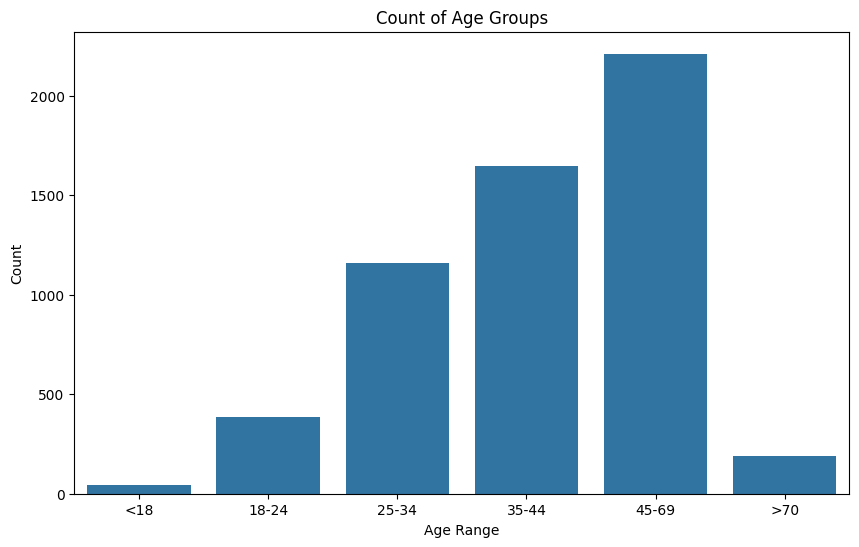

In [ ]:
# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', data=df, order=['<18', '18-24', '25-34', '35-44', '45-69', '>70'])
plt.title('Count of Age Groups')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

In [ ]:
# --- Map 'education' to coarse groups (keeps original; creates 'education_group') ---
# Rationale: domain-level grouping improves stability and interpretability.

def _norm_token_series(s: pd.Series) -> pd.Series:
    s = s.astype('string').str.strip().str.lower()
    s = s.str.replace(r"[^\w\s]", "", regex=True).str.replace(r"\s+", "", regex=True)
    return s.replace({"": pd.NA, "nan": pd.NA, "none": pd.NA})

# Build normalized token → group dictionary (adult-income style taxonomy)
edu_map_norm = {
    # Primary / Elementary
    "preschool": "Primary",
    "1st4th": "Primary",
    "5th6th": "Primary",
    "7th8th": "LowerSecondary",
    "9th": "LowerSecondary",
    "10th": "UpperSecondary",
    "11th": "UpperSecondary",
    "12th": "UpperSecondary",

    # High school graduate
    "hsgrad": "UpperSecondary",       # covers HS-grad / HSgrad

    # Some college / Associate
    "somecollege": "SomeCollege/Assoc",
    "assocacdm": "SomeCollege/Assoc",
    "assocvoc": "SomeCollege/Assoc",

    # Higher education
    "bachelors": "Bachelors",
    "masters": "Graduate",
    "profschool": "Graduate",
    "doctorate": "Graduate",
}

if 'education' in df.columns:
    edu_norm = _norm_token_series(df['education'])
    df['education_group'] = edu_norm.map(edu_map_norm).fillna('Other').astype('category')

# Peek
print(df['education_group'].value_counts(dropna=False))


education_group
UpperSecondary       1870
SomeCollege/Assoc    1530
Bachelors            1185
Graduate              857
LowerSecondary        140
Primary                64
Name: count, dtype: int64


In [ ]:
# --- Categorical audit + optional rare-level lumping (generic) ---------------
import numpy as np
from collections import defaultdict

def categorical_audit(df, exclude=None, top=5):
    """
    Build a per-column audit for object/string/category columns:
    - n_unique, missing, %missing
    - top-k levels with counts (as a compact string)
    - rare_share (proportion outside top-k)
    """
    if exclude is None:
        exclude = []
    cols = df.select_dtypes(include=['object','string','category']).columns.difference(exclude)
    rows = []
    n = len(df)
    for c in cols:
        vc = df[c].value_counts(dropna=True)
        miss = int(df[c].isna().sum())
        topk = "; ".join([f"{idx}:{cnt}" for idx, cnt in vc.head(top).items()])
        rare_share = float(vc.iloc[top:].sum())/n if len(vc) > top else 0.0
        rows.append({
            "column": c,
            "n_unique": int(df[c].nunique(dropna=False)),
            "missing": miss,
            "%missing": round(miss*100/n, 2),
            "top_levels": topk,
            "rare_share": round(rare_share*100, 2),
        })
    return pd.DataFrame(rows).sort_values(["n_unique","rare_share"], ascending=[False, False])

audit = categorical_audit(df, exclude=['income','ID'])  # exclude target/ID from audit
print(audit.head(12))

# Optional: apply rare→Other to selected columns
def lump_rare(df_in, cols, min_prop=0.01, label="Other"):
    df_out = df_in.copy()
    n = len(df_out)
    min_count = max(1, int(np.ceil(min_prop * n)))
    summary = []
    for c in cols:
        vc = df_out[c].value_counts(dropna=True)
        keep = vc[vc >= min_count].index
        # ensure label doesn't collide
        lab = label if label not in keep else f"{label}_~"
        before = int(df_out[c].nunique(dropna=False))
        df_out[c] = df_out[c].where(df_out[c].isin(keep), other=lab).astype('category')
        after = int(df_out[c].nunique(dropna=False))
        summary.append({"column": c, "levels_before": before, "levels_after": after,
                        "min_count": min_count, "other_label": lab,
                        "%rows_other": round((df_out[c].eq(lab).mean()*100),2)})
    return df_out, pd.DataFrame(summary).sort_values("levels_before", ascending=False)

# Example: lump only columns whose audit suggests high rare_share or high n_unique:
to_lump = audit.query("n_unique > 10 or rare_share > 5")['column'].tolist()
print("Columns selected for lumping (rule-of-thumb):", to_lump)

# If you want to actually lump:
# df, lump_report = lump_rare(df, to_lump, min_prop=0.01, label="Other")
# print(lump_report)


             column  n_unique  missing  %missing  \
1         education        16        0      0.00   
6        occupation        15        0      0.00   
4    native.country        14      114      2.02   
10        workclass         8        0      0.00   
3    marital.status         7        0      0.00   
5     native.region         7        0      0.00   
8      relationship         6        0      0.00   
2   education_group         6        0      0.00   
0         age_range         6        0      0.00   
7              race         5        0      0.00   
9         sex_label         2        0      0.00   

                                           top_levels  rare_share  
1   HS-grad:1573; Bachelors:1185; Some-college:108...       18.85  
6   Prof-specialty:1019; Exec-managerial:996; Craf...       31.28  
4   UnitedStates:5126; Asia:155; North America:109...        1.01  
10  Private:3683; Self-emp-not-inc:525; Local-gov:...        7.35  
3   Married-civ-spouse:3388; Never-

In [ ]:
df['native.country'].value_counts()

native.country
UnitedStates             5126
Asia                      155
North America             109
Europe                     64
UK                         21
ElSalvador                 14
PuertoRico                 14
South America              12
Center America              7
DominicanRepublic           6
TrinadadTobago              2
OutlyingUSGuamUSVIetc       1
HolandNetherlands           1
Name: count, dtype: int64

In [ ]:
df['education'].value_counts()

education
HS-grad         1573
Bachelors       1185
Some-college    1082
Masters          486
Assoc-voc        256
Prof-school      230
Assoc-acdm       192
11th             144
Doctorate        141
10th             109
7th-8th           84
9th               56
12th              44
5th-6th           39
1st-4th           19
Preschool          6
Name: count, dtype: int64

In [ ]:
df['occupation'].value_counts()

occupation
Prof-specialty       1019
Exec-managerial       996
Craft-repair          676
Sales                 662
Adm-clerical          527
Other-service         344
Machine-op-inspct     287
?                     274
Transport-moving      259
Tech-support          184
Handlers-cleaners     154
Farming-fishing       142
Protective-serv       105
Priv-house-serv        14
Armed-Forces            3
Name: count, dtype: int64

## Saving Manipulated data

In [ ]:
FINAL_BASE = save_snapshot_df(df, "final_for_eda")
print("Saved at:", FINAL_BASE)
# יווצרו קבצים תחת artifacts/: parquet/או csv + קובץ schema.json עם dtypes


[Saved] artifacts\20250914-220536_final_for_eda.csv + 20250914-220536_final_for_eda_schema.json
Saved at: artifacts\20250914-220536_final_for_eda


Another option is Pickle file

# Pickle file

A pickle file in Python is used to serialize and deserialize Python objects. <br>Serialization (write binary) is the process of converting a Python object into a byte stream, which can then be written to a file or transmitted over a network. <br>Deserialization (read binary) is the reverse process, converting the byte stream back into a Python object.

In [ ]:
df.to_pickle('mrg_df_after_data_prep_5.2.25.pkl')
df=pd.read_pickle('mrg_df_after_data_prep_5.2.25.pkl')

In [ ]:
import pickle
#Write a pickle file
with open('income.pkl', 'wb') as f:
    pickle.dump(df, f)

print("income dataset saved as a pickle file.")

income dataset saved as a pickle file.


In [ ]:
#Read a pickle file and load the data
with open('income.pkl', 'rb') as file:
   loaded_data = pickle.load(file)

In [ ]:
loaded_data

# We got A flat file, Next to EDA

# DATA PREP — Step‑by‑Step Summary (2025‑09‑14)

Goal: produce a single, clean, merged dataset ready for a separate EDA notebook and future modeling. This log lists what we did, why, and what we saved.

## Step 1 — Load inputs

Load two raw files as df1 and df2.
Work in Jupyter; keep all outputs under artifacts/.

## Step 2 — Quick health reports

Run quick_data_report(df, title, top_n) on each file to see shape, dtypes, missing values, duplicates, and quick stats.
Build an Ultra Report (one row per column: dtype, missing, unique, sample values) and save CSV/Excel.
Saved: artifacts/<timestamp>_ultra_report_*.csv|.xlsx

## Step 3 — Schema comparison

Compare columns and dtypes across df1 and df2.
Identify: common columns, columns only in each file, and any dtype mismatches (none in our case).

## Step 4 — Merge‑key checks

Test candidates (e.g., fnlwgt, age+fnlwgt, fnlwgt+education.num, age+education.num+fnlwgt).
For each: check missingness, duplicates by key, and key overlap.
Decision: use ['age','workclass','fnlwgt'] (after text standardization) for an inner join.

## Step 5 — Merge

Merge to merged_df = pd.merge(df1, df2, on=['age','workclass','fnlwgt'], how='inner').
Result: 5,646 rows × 21 cols.
Save a raw snapshot of the merged table.
Saved: artifacts/<timestamp>_raw_loaded.*

## Step 6 — Structural cleaning (post‑merge)

Detect _x/_y column pairs (workclass/education/marital.status/occupation/relationship).
Consolidation rules per pair:
If values are equal → keep one column.
If one side is NA → fill from the other.
If conflicting → keep both sources for now and flag.

## Step 7 — Soft normalization of text

Standardize textual categories (trim spaces, collapse whitespace, remove literal hyphens) to collapse near‑duplicates (e.g., HS-grad vs HSgrad).
After normalization, many “conflicts” disappeared and _x/_y sources were dropped safely.
Resulting table size after cleanup: 5,646 × 16 (no duplicates; tidy categories).

## Step 8 — Type setup

Standardize all string‑like columns (preserve <NA>).
Convert key categoricals to category dtype (memory‑efficient): workclass, education, marital.status, occupation, relationship, race, native.country, age_range.
Ensure age_range is ordered: <18, 18–24, 25–34, 35–44, 45–69, >70.
Ensure identifiers like ID are string.

Target:
Keep income_label (readable),
Map income → binary {<=50K:0, >50K:1} as Int8.

## Step 9 — Missing data

Only native.country had missing values (114 rows ≈ 2.0%).
Create flag native.country_was_missing; fill to explicit category "Unknown".
Save snapshot.

## Step 10 — Domain mappings

Country → Region: create native.region using a normalized dictionary; keep native.country unchanged.
Regions: North America, Europe, Asia, Central America, South America, Caribbean, Unknown.
Education grouping: create education_group with interpretable buckets: Primary, LowerSecondary, UpperSecondary, SomeCollege/Assoc, Bachelors, Graduate.
Save snapshot.

## Step 11 — Categorical audit (coverage & “tail”)

Build an audit table for all categorical features: n_unique, %missing, top levels, rare_share.
Guidance:
Rule‑of‑thumb: levels with <~1% of rows are “rare” and candidates for Other (only when helpful).
Prefer domain groupings (education_group, native.region) over blind Other.

## Step 12 — Decisions on rare levels

education: do not lump; use education_group for modeling/EDA and keep education as reference.
native.country: do not lump; use native.region; keep countries as reference.
occupation: replace '?' → Unknown. Optionally create occupation_lumped at ~1% (keep original intact).
workclass: optional lumping at ~0.5–1%.

## Step 13 — Age bands

Verify/compute age_range from numeric age with explicit bins and ordered categories (left‑closed, right‑open).
Step 14 — Final saves for EDA
Preferred: Parquet (if pyarrow/fastparquet available) + CSV (portable) + PKL (Python‑only cache).
If Parquet engine missing now, keep CSV/PKL; install later and re‑export.
df.to_parquet('artifacts/final_for_eda.parquet', index=False)
df.to_csv('artifacts/final_for_eda.csv', index=False, encoding='utf-8')
df.to_pickle('artifacts/final_for_eda.pkl')

## Step 15 — What to use in the EDA notebook

Use income (0/1) as target and keep income_label for readable plots.
Prefer education_group and native.region (stable, low‑cardinality) over raw education/native.country.
Consider occupation_lumped if created; otherwise use occupation with a clear Unknown level.
Use age_range (ordered), sex (0/1 with sex_label), and other cleaned categoricals.

## Artifacts we saved along the way (examples)

artifacts/<ts>_raw_loaded.* — raw merged snapshot (+ schema JSON)
artifacts/<ts>_ultra_report_raw_merged.csv|.xlsx — column profile
artifacts/<ts>_post_structural_clean.* — after _x/_y consolidation
artifacts/<ts>_post_soft_conflict_normalization.* — after text normalization
artifacts/<ts>_post_missing_handling.* — after handling native.country missings
artifacts/<ts>_post_region_mapping_tailored.* — after region mapping
(optional) artifacts/<ts>_post_lumping_occ_workclass.* — if rare‑level lumping applied
artifacts/final_for_eda.(parquet|csv|pkl) — clean dataset for the next EDA notebook

Next: open a fresh EDA notebook; load final_for_eda and start descriptive analysis (frequency tables, cross‑tabs with income, and plots).


In [ ]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r"Beer_data_ EDA/income_v2.csv")
df

In [ ]:
df.shape

In [ ]:
df.info()